In [5]:
from matplotlib import pyplot as plt

def plot_results(title, training_results, testing_results):
    (fig, ax) = plt.subplots(1, 2)
    ax[0].plot(training_results['relevant_loss'], '--', color='blue')
    ax[0].plot(training_results['irrelevant_loss'], '--', color='red')
    ax[0].plot(testing_results['relevant_loss'], '-', color='blue')
    ax[0].plot(testing_results['irrelevant_loss'], '-', color='red')
    ax[1].plot(training_results['relevant_acc'], '--', color='blue')
    ax[1].plot(training_results['irrelevant_acc'], '--', color='red')
    ax[1].plot(testing_results['relevant_acc'], '-', color='blue')
    ax[1].plot(testing_results['irrelevant_acc'], '-', color='red')
    ax[1].set_ylim(0, 1)
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    fig.suptitle(title)
    plt.tight_layout()

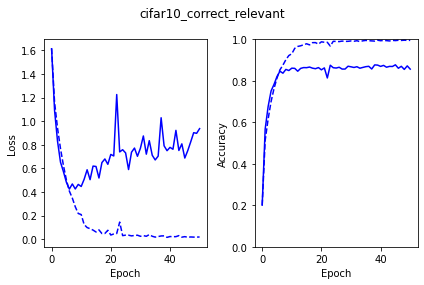

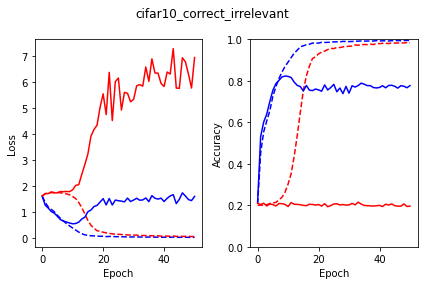

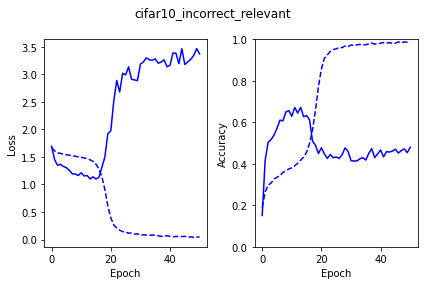

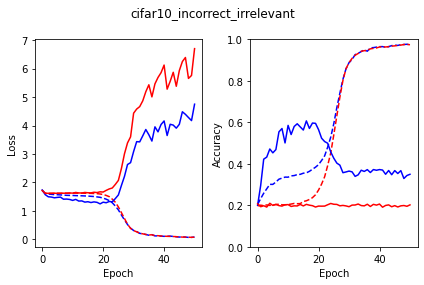

In [6]:
import os
import pickle

directories_to_plot = ['cifar10_correct_relevant',
                       'cifar10_correct_irrelevant', 
                       'cifar10_incorrect_relevant',
                       'cifar10_incorrect_irrelevant']
for directory in directories_to_plot:
    with open(os.path.join('.', 'results', directory, 'training_results.pickle'), 'rb') as F:
        training_results = pickle.load(F)
    with open(os.path.join('.', 'results', directory, 'testing_results.pickle'), 'rb') as F:
        testing_results = pickle.load(F)
    plot_results(directory, training_results, testing_results)